# Hands-on Tutorial for Link Analysis

Welcome to hands-on tutorial for link analysis. 
In this tutorial, we will study several techniques for link analysis in graphs. 
This tutorial consists of four sessions, and each session will handle the following topic:

* **Session 1**. Tutorial on PageRank - Part 1 (50 mins)
* **Session 2**. Tutorial on PageRank - Part 2 (50 mins)
* **Session 3**. Tutorial on Topic-specific PageRank (50 mins)
* **Session 4**. Tutorial on HITS (50 mins)

We recommend fully understanding link analysis (or ranking) models such as PageRank, Topic-specific PageRank, and HITS before entering this tutorial since we will **NOT** explain the theoretical backgrounds on these techniques during the tutorial. 
We will mainly focus on how to implement the algorithms of those models and how to rank nodes in real-world graphs using those ranking models. 

The main contributor of this material is as follows:
* *Jinhong Jung* (jinhongjung@snu.ac.kr)
------

## Session 1. Tutorial on PageRank - Part 1 (50 mins)
In this session, we will explore how to implement PageRank in Python. 
The main goals of this session are summarized as follows:
* **Goal 1.** How to implement PageRank based on dense matrices using `numpy` in Python
* **Goal 2.** How to verify your PageRank implementation
* **Goal 3.** To understand the problem of the dense matrix version

The outline of this session is as follows:
* **Step 1.** Review PageRank
* **Step 2.** Set up requirements for this tutorial
* **Step 3.** Implement PageRank - the dense matrix version
* **Step 4.** Validate your PageRank implementation
* **Step 5.** What is the problem of the dense matrix version?

------

### Step 1. Review PageRank
We will briefly review PageRank and its equation which are required for the implementation of PageRank in Python. 
Note that we will not touch the details on PageRank (e.g., how to derive PageRank equation). 

Before going further, let's check several mathematical notations used in this tutorial.
* **Scalar**: lower case & regular face
    - $\alpha$, $\beta$, and $\gamma$
* **Set**: upper case & regular face
    - $A$, $B$, and $C$
* **Vector** and **matrix**: smaller case for vectors & upper case for matrices & bold face
    - $\mathbf{x}$, $\mathbf{A}$, and $\mathbf{S}$
    - $x_{i}$ is $i$-th element of vector $\mathbf{x}$
    - $A_{ij}$ is $(i, j)$-th element of matrix $\mathbf{A}$
* **Number domain**: blackboard bold
    - $\mathbb{R}$: set of real numbers
    - $\mathbb{R}^{n}$: $n$-dimensional space in real numbers
        - set of $n$-dimensional vectors, i.e., $\mathbf{x} \in \mathbb{R}^{n}$
    - $\mathbb{R}^{n \times m}$: $n \times m$-dimensional space in real numbers
        - set of $n \times m$ real number matrices, i.e., $\mathbf{A}\in \mathbb{R}^{n \times m}$

------

#### Step 1-1. Mathematical definitions of PageRank
Now, let's look into the problem definition of PageRank to be implemented through this tutorial.
##### Problem definition of PageRank
* **Input**: adjacency matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$ of a graph $G=(V,E)$, and teleport probability $\beta$
    - $V$ is the set of nodes
    - $E$ is the set of edges
    - $n$ is the number of nodes in the graph $G$, i.e., $n=|V|$
    - $m$ is the number of edges in the graph $G$, i.e., $m=|E|$
* **Output**: the PageRank score vector $\mathbf{p} \in \mathbb{R}^{n}$ such that

$$\mathbf{p} = (1-\beta)\mathbf{\tilde{A}}^{\top}\mathbf{p} + \beta\mathbf{q}$$

- The above equation is called *PageRank equation*. The notations used in the PageRank equation are described below:
    - $\mathbf{\tilde{A}}$ is the row-normalized adjacency matrix of the graph $G$, i.e., the sum of each row of $\mathbf{\tilde{A}}$ should be $1$
    - $\mathbf{q}=\left[\frac{1}{n}\right]_{n}$ is $n$-dimensional vector whose entry is $1/n$. It is usually called a *query vector*.
    - The PageRank score of node $u$ is denoted by $p_u$ indicating the importance of node $u$ in the graph $G.$
------

The definitions of adjacency matrix $\mathbf{A}$ and row-normalized adjacency matrix $\mathbf{\tilde{A}}$ are described in the following definitions, respectively. 

##### Definition of adjacency matrix $\mathbf{A}$
For each edge $u \rightarrow v$ in $E$, $A_{uv}=1$. Otherwise, $A_{uv}=0$ (i.e., if there is no edge between two nodes, the value of the adjacency matrix is zero).

##### Definition of row-normalized adjacency matrix $\mathbf{\tilde{A}}$
For each edge $u \rightarrow v$ in $E$, $\tilde{A}_{uv}=\frac{1}{|O_{u}|}$ where $O_{u}$ is the set of out-neighbors of node $u$.
Let $\mathbf{D}$ be a diagonal matrix where $u$-th diagonal entry is $|O_{u}|$ (i.e., the out-degree of node $u$).
Then, the row-normalized adjacency matrix $\mathbf{\tilde{A}}$ is easily obtained by the following equation:

$$\mathbf{\tilde{A}} = \mathbf{D}^{-1}\mathbf{A}$$

where $\mathbf{D}^{-1}$ is the inverse of $\mathbf{D}$ (i.e., $u$-th diagonal entry of $\mathbf{D}^{-1}$ is $\frac{1}{|O_{u}|}$).

------

#### Step 1-2. Iterative Algorithm for PageRank

The PageRank score vector $\mathbf{p}$ is obtained by iteratively computing the PageRank equation. 
The following pseudo-code represents the iterative algorithm for PageRank.

<img src="./images/iterative-algorithm-pagerank.png" width="400">

We will implement the iterative algorithm in Python. 

------

### Step 2. Set up requirements for this tutorial

Before going further, we need to check if several Python packages are installed. 
We will use `numpy`, `matplotlib`, and `pandas` in this session. 
Let's check the installation. 
If you encounter error messages, please install required packages. 
If there is no any message, you can move to the next step. 

In [1]:
try:
    import numpy
except ImportError:
    print("numpy is not installed, type pip install numpy")

try:
    import matplotlib
except ImportError:
    print("matplotlib is not installed, type pip install matplotlib")
    
try:
    import pandas
except ImportError:
    print("pandas is not installed, type pip install pandas")

### Step 3. Implement PageRank - the dense matrix version

In this step, we will implement the iterative algorithm for PageRank using dense matrices provided by *numpy* in Python. 

Note that we will test the dense version implementation using a small graph since it has a scalability issue, which will be discussed in Step 5 (and, we will resolve this issue in Session 2).

#### Step 3-0. Description of a dataset used in this step

We describe a small graph dataset used in this step. 
The name of the dataset is *SeventhGraders* which is a social network describing connections between students. 
More specifically, this directed network contains friendships between students from 29 seventh grade students from a school in Victoria. 
A node represents a student. 
An edge between two nodes shows that the left student picked the right student as his friend (e.g., $u \rightarrow v$ indicates $u$ considers $v$ as his friend).
The statistics of the dataset is as follows:

| Statistic | Value |
| --- | --- |
| $n$: the number of nodes | 29 |
| $m$: the number of edges | 376|
| the number of female students | 17 |
| the number of male students | 12 |

The dataset is located at `./data/small` contatining `edges.tsv` and `node_labels.tsv`.
The format of each file is is as follows:
* `edges.tsv`: This file contains the list of (directed) edges with the format `source_node \t target_node \t weight`. The node index starts from `0`. The following is the top-5 head lines of the file.
```
0        1        1
0        2        1
0        3        1
0        4        1
0        5        1
...
```
* `node_labels.tsv`: This file contains the list of node labels with the format `node \t label`. Each label indicates the node's gender and (anonymous) name. The following is the top-5 head lines of the file. 
```
0        male_noah
1        male_liam
2        male_william
3        male_benjamin
4        male_jacob
...
```

#### Step 3-1. Implement the phase for loading the graph dataset
Your first job is to implement functions `load_graph_dataset` and `load_node_labels` to load the datasets `edges.tsv` and `node_labels.tsv`.
These functions are given the directory path for the dataset (i.e., `./data/small`), and load the adjacency matrix $\mathbf{A}$ and the list of nodes labels of the graph, respectively. 

In [2]:
# the below commands restrict the number of computation threads to 1
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 

import numpy as np
import pandas as pd

We briefly introduce several APIs in `numpy` used when implementing the below function which constructs the adjacency matrix of a graph.
* `loadtxt`: this loads data from a text file
    - https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html
* `amax`: this returns the maximum of an array
    - https://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html
* `shape`: this returns the dimension of an array (or matrix)
    - `A.shape` will return `(m, n)` where m is # of rows, and n is # of columns 
    - https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html
* `count_nonzero`: this returns the number of non-zeros of a matrix
    - https://docs.scipy.org/doc/numpy/reference/generated/numpy.count_nonzero.html
* slice: `edges[:, 0:2]` will return the first and second columns of `edges` matrix.


In [3]:
class DensePageRank:
    def load_graph_dataset(self, data_home, is_undirected=False):
        '''
        Load the graph dataset from the given directory (data_home)

        inputs:
            data_home: string
                directory path conatining a dataset
            is_undirected: bool
                if the graph is undirected
        '''
        # Step 1. set file paths from data_home
        edge_path = "{}/edges.tsv".format(data_home)

        # Step 2. read the list of edges from edge_path
        edges = np.loadtxt(edge_path, dtype=int)
        n = int(np.amax(edges[:, 0:2])) + 1 # the current n is the maximum node id (starting from 0)

        # Step 3. convert the edge list to the adjacency matrix
        self.A = np.zeros((n, n))
        for i in range(edges.shape[0]):
            source, target, weight = edges[i, :]
            self.A[(source, target)] = weight
            if is_undirected:
                self.A[(target, source)] = weight

        # Step 4. set n (# of nodes) and m (# of edges)
        self.n = n                         # number of nodes
        self.m = np.count_nonzero(self.A)  # number of edges

Then, we implement a function for loading the node labels using `pandas`. 
* `read_csv`: this reads a file into `DataFrame` (a table)
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [4]:
class DensePageRank(DensePageRank):
    def load_node_labels(self, data_home):
        '''
        Load the node labels from the given directory (data_home)

        inputs:
            data_home: string
                directory path conatining a dataset
        '''
        label_path = "{}/node_labels.tsv".format(data_home)
        self.node_labels = pd.read_csv(label_path, sep="\t")

Let's check if the function is correctly implemented. 
Note that the dataset is a directed network; hence, you should set `is_unidrected` to `False`.

In [5]:
data_home = './data/small'
dpr = DensePageRank()
dpr.load_graph_dataset(data_home, is_undirected=False)
dpr.load_node_labels(data_home)

# print the number of nodes and edges
print("The number n of nodes: {}".format(dpr.n))
print("The number m of edges: {}".format(dpr.m))

# print the heads (5) of the node labels
display(dpr.node_labels.head(5))

The number n of nodes: 29
The number m of edges: 376


,node_id,label
0,0,male_noah
1,1,male_liam
2,2,male_william
3,3,male_benjamin
4,4,male_jacob


#### Step 3-2. Implement the normalization phase
Next, we need the row-normalized adjacency matrix $\mathbf{\tilde{A}}$ of the adjacency matrix $\mathbf{A}$. 
We briefly introduce several APIs in `numpy` for this cell. 
* `sum`: this performs the summation of an arror or a matrix
    * `A.sum(axis = 0)`: column-wise sum of matrix A (will be a vector)
    * `A.sum(axis = 1)`: row-wise sum of matirx A (will be a vector)
    * https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
* `dot`: this performs a matrix multiplication.
    * given matrix `A` and vector `x`, `A.dot(x)` will perform the matrix-vector multiplication between `A` and `x`, i.e., `Ax`.
    * https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.dot.html
* `diag`: given a vector, this builds a diagonal matrix whose diagonal entries corresponds to the given vector. 
    * https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html
* `T`: this takes the transpose of a matrix, e.g., A.T is the transpose of matrix A

In this phase, our goal is to implement the following operation: 

$$\mathbf{\tilde{A}} = \mathbf{D}^{-1}\mathbf{A}$$

Here is one trick for the diagonal matrix $\mathbf{D}$. 
One of mathematical properties of a diagonal matrix is that the inverse of the diagonal matrix is the matrix whose diagonal entries are inverted. 
Hence, we do not need to do matrix inversion explicitly for this. 
Let $\text{diag}(d_1, \cdots, d_n)$ be a diagonal matrix. 
Then, $\text{diag}(d_1, \cdots, d_n)^{-1} = \text{diag}(d_1^{-1}, \cdots, d_n^{-1})$.

In [6]:
class DensePageRank(DensePageRank):
    def normalize(self):
        '''
        Perform the row-normalization of the given adjacency matrix
        '''
        # Step 1. obatin the out-degree vector d
        d = self.A.sum(axis = 1)           # row-wise summation

        # Step 2. obtain the inverse of the out-degree matrix
        d = np.maximum(d, np.ones(self.n)) # handles zero out-degree nodes, `maximum` perform entry-wise maximum 
        invd = 1.0 / d                # entry-wise division
        invD = np.diag(invd)          # convert invd vector to a diagonal matrix

        # Step 3. compute the row-normalized adjacency matrix
        self.nA = invD.dot(self.A)   # nA = invD * A
        self.nAT = self.nA.T         # nAT is the transpose of nA
        
        self.out_degrees = d

Let's check if the function is correctly implemented. 
Note that in the row-normalized matrix $\mathbf{\tilde{A}}$, the sum of each row should be $1$.
Hence, check if the sum of each row of $\mathbf{\tilde{A}}$ is $1$. 

*CAUTION*: someone might encounter $0.99999...$ instead of exact $1.0$ due to floating point operations.
In that case, you can ignore very small error in the values. This is not that critical for the final PageRank scores. 
If you see a value of a node much less than $1$ where the out-degree of the node is greater than $0$, then you need to inspect if there is an error in your implementation.
If the out-degree of a node is $0$, then the row-wise sum should be $0$.

In [7]:
dpr = DensePageRank()
dpr.load_graph_dataset('./data/small', is_undirected=False)
dpr.normalize()

# check the sum of each row in the row-normalized matrix nA
row_sums = dpr.nA.sum(axis=1)
for (i, degree, row_sum) in zip(range(dpr.n), dpr.out_degrees, row_sums):
    print("node: {:2d}, out-degree: {:2d},  row_sum: {:.2f}".format(i, int(degree), row_sum))

node:  0, out-degree: 14,  row_sum: 1.00
node:  1, out-degree: 15,  row_sum: 1.00
node:  2, out-degree: 17,  row_sum: 1.00
node:  3, out-degree: 23,  row_sum: 1.00
node:  4, out-degree: 27,  row_sum: 1.00
node:  5, out-degree: 27,  row_sum: 1.00
node:  6, out-degree: 12,  row_sum: 1.00
node:  7, out-degree: 14,  row_sum: 1.00
node:  8, out-degree: 16,  row_sum: 1.00
node:  9, out-degree: 12,  row_sum: 1.00
node: 10, out-degree: 14,  row_sum: 1.00
node: 11, out-degree: 10,  row_sum: 1.00
node: 12, out-degree: 13,  row_sum: 1.00
node: 13, out-degree:  8,  row_sum: 1.00
node: 14, out-degree:  9,  row_sum: 1.00
node: 15, out-degree:  5,  row_sum: 1.00
node: 16, out-degree:  6,  row_sum: 1.00
node: 17, out-degree:  1,  row_sum: 1.00
node: 18, out-degree:  6,  row_sum: 1.00
node: 19, out-degree: 13,  row_sum: 1.00
node: 20, out-degree: 15,  row_sum: 1.00
node: 21, out-degree: 19,  row_sum: 1.00
node: 22, out-degree: 12,  row_sum: 1.00
node: 23, out-degree: 16,  row_sum: 1.00
node: 24, out-de

#### Step 3-3. Implement the iterative phase
Now, we are ready to implement the iterative algorithm for PageRank. 
Based on Algorithm 1, we will fill the following function `iterate_PageRank`.
For convenience, we provide the iterative algorithm in this cell again. 

<img src="./images/iterative-algorithm-pagerank.png" width="400">


In [8]:
class DensePageRank(DensePageRank):
    def iterate_PageRank(self, b=0.15, epsilon=1e-9, maxIters=100):
        '''
        Iterate the PageRank equation to obatin the PageRank score vector

        inputs:
            b: float (between 0 and 1)
                the teleport probability
            epsilon : float
                the error tolerance of the iteration
            maxIters : int
                the maximum number of iterations

        outputs:
            p: np.ndarray (n x 1 vector)
                the final PageRank score vector
            residuals: list
                the list of residuals over the iteration
        '''
        q = np.ones(self.n)/self.n     # set the query vector q
        old_p = q                      # set the previous PageRank score vector
        residuals = []                 # set the list for residuals over iterations

        for t in range(maxIters):
            p = (1 - b) * (self.nAT.dot(old_p)) + (b * q)
            residual = np.linalg.norm(p - old_p, 1)
            residuals.append(residual)
            old_p = p

            if residual < epsilon:
                break

        return p, residuals

Let's check the result of the iterative algorithm. 

In [9]:
data_home = './data/small'
dpr = DensePageRank()
dpr.load_graph_dataset(data_home, is_undirected=False)
dpr.load_node_labels(data_home)
dpr.normalize()
p, residuals = dpr.iterate_PageRank(b=0.15, epsilon=1e-9, maxIters=100)

# print the PageRank score of each node
for (i, score) in zip(range(dpr.n), p):
    print("node: {:2d}, PageRank score: {:.4f}".format(i, score))

node:  0, PageRank score: 0.0237
node:  1, PageRank score: 0.0393
node:  2, PageRank score: 0.0387
node:  3, PageRank score: 0.0177
node:  4, PageRank score: 0.0345
node:  5, PageRank score: 0.0446
node:  6, PageRank score: 0.0200
node:  7, PageRank score: 0.0522
node:  8, PageRank score: 0.0518
node:  9, PageRank score: 0.0327
node: 10, PageRank score: 0.0508
node: 11, PageRank score: 0.0435
node: 12, PageRank score: 0.0466
node: 13, PageRank score: 0.0454
node: 14, PageRank score: 0.0420
node: 15, PageRank score: 0.0334
node: 16, PageRank score: 0.0214
node: 17, PageRank score: 0.0203
node: 18, PageRank score: 0.0183
node: 19, PageRank score: 0.0437
node: 20, PageRank score: 0.0478
node: 21, PageRank score: 0.0243
node: 22, PageRank score: 0.0449
node: 23, PageRank score: 0.0274
node: 24, PageRank score: 0.0346
node: 25, PageRank score: 0.0350
node: 26, PageRank score: 0.0255
node: 27, PageRank score: 0.0187
node: 28, PageRank score: 0.0211


------

### Step 4. Validate your PageRank implementation

In this step, we will verify if the implementation for PageRank is correctly done. 
There are two ways to perform the validation. 
First, we need to check if the residuals over the iteration decrease monotonically. 
Second, we should check if the solution from the iteration phase is equal (very close) to the exact solution from the closed form of the PageRank equation.
We will describe the details on the closed form in Step 4-2. 
After checking these, we will implement a function for ranking nodes in the order of PageRank scores in Step 4-3.

#### Step 4-1. Check if the residuals monotonically decrease

Note that we stored the residuals into `residuals` returned by `iterate_PageRank` as the second argument. 
In other words, by plotting `residuals`, we can check the tendency of the residuals over the iterations. 
For this, we first import `matplotlib` as follows:

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13}) # set the font-size in the figure

We will implement a function `plot_residuals` for the plot since it will be used for validating the implementations for other models such as Topic-specific PageRank and HITS. 
Let's fill the following function.

In [11]:
def plot_residuals(residuals, title):
    plt.semilogy(residuals, marker='o', markersize=5)
    plt.title(title)
    plt.ylim(bottom=1e-10, top=1e-0)
    plt.ylabel('Residual')
    plt.xlabel('# of iterations')
    plt.grid(True)
    plt.show()

Let's check the plot for the residuals using `plot_residuals`. 

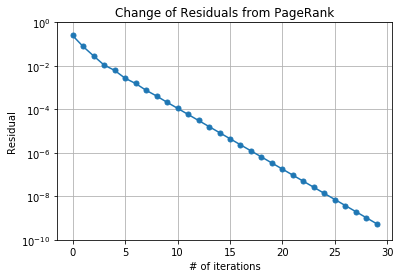

In [12]:
plot_residuals(residuals, 'Change of Residuals from PageRank')

Note that the residual should decrease monotonically as the number of iterations increases, and the line should be terminated when the residual is less than the given error tolerance (e.g., $\epsilon=10^{-9}$ in this example).

The residual indicates the difference between the current PageRank score vector and the previous one. 
In other words, the difference decreases as the number of iterations increases. 
Theoretically, they become the same when we infinitely repeat the iteration, and we call this situation *convergence*. 
When the residual behaves as in the figure, we say the PageRank score vector converges. 

One remaining question is then, *is the converged PageRank score vector really true value?* Note that since the residual is the difference of the consecutive score vectors, we cannot answer the question with only this plot. 

One short answer is *YES*, it always converges to the true PageRank score vector, which has been proved theoretically. 
We won't handle the theoretical proofs since it is too complex to cover during the tutorial. 
Instead, we will check this point empirically in the following step. 

#### Step 4-2. Check if the iterative solution is equal to the exact solution of PageRank

We first derive the closed form of the PageRank equation as follows:

$$
\mathbf{p} = (1-\beta)\mathbf{\tilde{A}}^{\top}\mathbf{p} + \beta\mathbf{q} \\
\Leftrightarrow \mathbf{p} - (1-\beta)\mathbf{\tilde{A}}^{\top}\mathbf{p} = \beta\mathbf{q} \\
\Leftrightarrow \left(\mathbf{I} - (1-\beta)\mathbf{\tilde{A}}^{\top}\right)\mathbf{p} = \beta\mathbf{q} \\
\Leftrightarrow \mathbf{p} = \beta\left(\mathbf{I} - (1-\beta)\mathbf{\tilde{A}}^{\top}\right)^{-1}\mathbf{q} \\
$$

where $\mathbf{I}$ is the identity matrix whose dimension is $n$. 
According to the derivation, we are able to directly compute the PageRank score without the iteration. 
And, the solution from the closed form is called the *exact solution*.
The reason why we implement the iterative phase is that the matrix inversion is a very expensive operation; 
hence, it is intractable to compute the PageRank score on a large-scale graphs via matrix inversion. 
However, for a small graph, we can perform the matrix inversion to obtain the exact solution in a reasonable time, and use the solution to compare with the iterative solution.

For this, we implement a function `compute_exact_PageRank` based on the closed form. 

In [13]:
class DensePageRank(DensePageRank):
    def compute_exact_PageRank(self, b=0.15):
        '''
        Compute the exact PageRank score vector from the closed form

        inputs:
            b: float (between 0 and 1)
                the teleport probability
        outputs:
            p: np.ndarray (n x 1 vector)
                the final PageRank score vector
        '''
        q = np.ones(self.n)/self.n          # set the query vector q

        H = np.eye(self.n) - (1.0 - b)*self.nAT
        invH = np.linalg.inv(H)

        p = b*(invH.dot(q))

        return p

Now, let's compare the exact PageRank score vector and the iterative one. 
One convenient way is to measure the difference between them using L1-norm as

$$
error = \lVert \mathbf{p}_{exact} - \mathbf{p}_{iter}\rVert_{1}
$$

where $\mathbf{p}_{exact}$ is the exact PageRank score vector, and $\mathbf{p}_{iter}$ is the iterative one.

In [14]:
data_home = './data/small'
dpr = DensePageRank()
dpr.load_graph_dataset(data_home, is_undirected=False)
dpr.load_node_labels(data_home)
dpr.normalize()

p_exact = dpr.compute_exact_PageRank(b=0.15)
p_iter, _ = dpr.iterate_PageRank(b=0.15, epsilon=1e-9, maxIters=100)

error = np.linalg.norm(p_exact - p_iter, 1)
print("Error between exact and iterative PageRank scores: {:e}".format(error))

Error between exact and iterative PageRank scores: 5.964698e-10


Note that the error between them is very small, e.g., less than $10^{-10}$ which is considered as zero in practice. 
We can check each score node by node as follows:

In [15]:
for (i, exact_score, iter_score) in zip(range(dpr.n), p_exact, p_iter):
    print("node: {:2d}, exact_score: {:.7f}, iter_score: {:.7f}".format(i, exact_score, iter_score))

node:  0, exact_score: 0.0237413, iter_score: 0.0237413
node:  1, exact_score: 0.0393204, iter_score: 0.0393204
node:  2, exact_score: 0.0387131, iter_score: 0.0387131
node:  3, exact_score: 0.0177171, iter_score: 0.0177171
node:  4, exact_score: 0.0345046, iter_score: 0.0345046
node:  5, exact_score: 0.0445602, iter_score: 0.0445602
node:  6, exact_score: 0.0199576, iter_score: 0.0199576
node:  7, exact_score: 0.0521591, iter_score: 0.0521591
node:  8, exact_score: 0.0517924, iter_score: 0.0517924
node:  9, exact_score: 0.0326633, iter_score: 0.0326633
node: 10, exact_score: 0.0508263, iter_score: 0.0508263
node: 11, exact_score: 0.0434542, iter_score: 0.0434542
node: 12, exact_score: 0.0466453, iter_score: 0.0466453
node: 13, exact_score: 0.0453634, iter_score: 0.0453634
node: 14, exact_score: 0.0419984, iter_score: 0.0419984
node: 15, exact_score: 0.0333760, iter_score: 0.0333760
node: 16, exact_score: 0.0214356, iter_score: 0.0214356
node: 17, exact_score: 0.0203439, iter_score: 0.

You can check there is no difference between their scores up to 7 decimal places.

#### Step 4-3. Check the ranking result from the PageRank scores
We will implement a function `rank_nodes` to rank nodes in order of given ranking scores. 

In [16]:
class DensePageRank(DensePageRank):
    def rank_nodes(self, ranking_scores, topk=-1):
        '''
        Rank nodes in the order of given ranking scores. 
        This function reports top-k rankings. 

        inputs:
            ranking_scores: np.ndarray
                ranking score vector
            topk: int
                top-k ranking parameter, default is -1 indicating report all ranks
        '''
        sorted_nodes = np.flipud(np.argsort(ranking_scores)) # argsort in the descending order
        sorted_scores = ranking_scores[sorted_nodes]         # sort the ranking scores
        ranks = range(1, self.n+1) # 0~n-1

        result_labels = self.node_labels.iloc[sorted_nodes][0:topk]
        result_labels.insert(0, "rank", ranks[0:topk])
        result_labels["score"] = sorted_scores[0:topk]
        result_labels.reset_index(drop = True, inplace = True)
        return result_labels

Let's see the ranking results from the function. 
We are going to check top-10 ranks in the order of PageRank scores in the graph. 

In [17]:
data_home = './data/small'
dpr = DensePageRank()
dpr.load_graph_dataset(data_home, is_undirected=False)
dpr.load_node_labels(data_home)
dpr.normalize()
p, _ = dpr.iterate_PageRank(b=0.15, epsilon=1e-9, maxIters=100)

# display top-10 ranking in the order of PageRank scores
display(dpr.rank_nodes(p, topk=10))

,rank,node_id,label,score
0,1,7,female_emma,0.052159
1,2,8,female_olivia,0.051792
2,3,10,female_isabella,0.050826
3,4,20,female_emily,0.047817
4,5,12,female_mia,0.046645
5,6,13,female_amelia,0.045363
6,7,22,female_harper,0.044910
7,8,5,male_elijah,0.044560
8,9,19,female_abigail,0.043734
9,10,11,female_sophia,0.043454


Note that there are $9$ female students among top-$10$ rankings in the graph. 
This implies that there would be a strong tie between female students with many connections from other students (remind the intuition behind PageRank that more important students are likely to receive more links from other students).

### Step 5. What is the problem of the dense matrix version?

Before finishing this session, let's check the problem of the dense matrix version of PageRank `iterate_PageRank`. 
The main issue of the dense matrix version is a *scalability*, i.e., when we need to handle a large-scale network, that function requires intractable running time and memory space. 
More specifically, the function requires $O(n^{2})$ space from the row-normalized adjacency matrix `nA`, an $n \times n$ matrix where $n$ is the number of nodes. 
Also, for each iteration, it requires $O(n^{2})$ time due to the dense matrix-vector multiplication `nAT.dot(old_p)`.

One notable thing is that a (large) real-world network is extremely sparse. 
From many real-world networks, we can notice that the number $m$ of edges is constantly linear to the number $n$ of nodes, i.e., $m = cn$ where $c$ is a certain constant. 
If we can ignore storing $0$ values in a matrix (or only store non-zero values), we are able to reduce the time and space complexities to $O(m)$, which is much smaller than $O(n^2)$.  

Let's check this point using another real-world network.
First, open a medium size dataset at `./data/medium` which is another directed graph (we will not explain the details on this graph since we want to just check the sparsity of the real-world graph). 

In [18]:
dpr = DensePageRank()
dpr.load_graph_dataset('./data/medium', is_undirected=False)
print("The number n of nodes: {}".format(dpr.n))
print("The number m of edges: {}".format(dpr.m))

The number n of nodes: 2539
The number m of edges: 12969


Note that the number of edges are linearly proportional to that of nodes (i.e., $m \simeq 5.1n$).
According to the result, we can easily check $O(m)$ is much less than $O(n^2)$.
To measure the sparsity of the network, we define the sparsity as follows:

$$
\text{sparsity} = 1.0 - \frac{m}{n^2}
$$

which is the portion of the empty area in the adjacency matrix with width $n$. 
Let's see the sparsity of the network using the above metric. 

In [19]:
class DensePageRank(DensePageRank):
    def compute_sparsity(self):
        sparsity = 1.0 - self.m/(self.n*self.n)
        return sparsity

dpr = DensePageRank()
dpr.load_graph_dataset('./data/medium', is_undirected=False)    
sparsity = dpr.compute_sparsity()
print("The sparsity of the network: {:.4f}".format(sparsity))

The sparsity of the network: 0.9980


Note that the network is extremely sparse; there are many empty values in the adjacency matrix. 
We can visualize the adjacency matrix to inspect the sparsity pattern of the matrix using `spy` function of `matplotlib`. 
Let's check the following cell. 

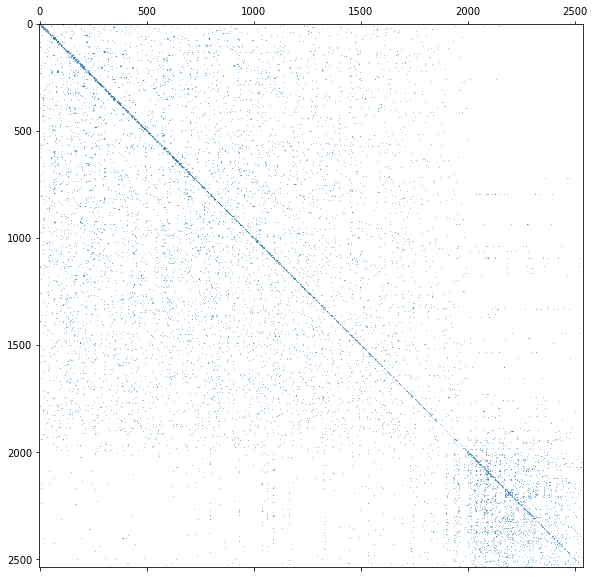

In [20]:
plt.figure(figsize=(10,10))      # resize the figure to be presented
plt.spy(dpr.A, markersize=0.1)   # sparsity pattern of the matrix 
plt.show()

As shown in the above figure, the matrix has a small number of non-zero entries, i.e., it is sparse. 
The point is that we do not need to store all those zero values when constructing a matrix. 
We will learn how to ignore zero values in the next session. 

## Session 1. Summary

In this session, we implemented PageRank (the dense matrix version) in Python. 
More specifically, we are able to answer the following goals now. 
* **Goal 1.** How to implement PageRank based on dense matrices using `numpy` in Python
    - We implemented the iterative algorithm for PageRank based on dense matrices.
* **Goal 2.** How to verify your PageRank implementation
    - We learned several techniques (e.g., residual check and comparison with the exact solution) for this. 
* **Goal 3.** To understand the problem of the dense matrix version
    - We explored how real-world networks are sparse quantitatively and visually. 
